# Car DEKHO

Autores: Gustavo Gutierrez e Christian Martins Teixeira

**Contextualização**: CarDekho é um site da Índia para a venda de automóveis. A base de dados que utilizaremos provem desse site e possui dados de venda de automóveis na Índia.

## Dicionário

- **name**: Nome do modelo do carro;
- **year**: Ano de fabricação do carro;
- **selling_price**: Preço de venda do carro;
- **km_driven**: Quantidade de quilometros rodados do veículo;
- **fuel**: Combustível utilizado pelo carro (Petro = gasolina);
- **seller_type**: Tipo do vendedor (Particular ou profissional);
- **transmission**: Tipo de transmissão;
- **Owner**: Quantidade de donos anteriores;

## objetivo

Criar um modelo de regressão que possa prever o valor de um carro na Índia, com a melhor precisão possível.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Carregando os dados

Importando o arquivo (dataset) .csv para a extração de dados

In [2]:
dataset = pd.read_csv('./CAR DETAILS FROM CAR DEKHO.csv')
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
missing_values = dataset.isnull().sum()
missing_values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Conforme o analisado, não há nenhum dado faltante em nosso dataset, logo, não precisamos realizar nenhuma tratativa quanto à isso.

## Distribuição de preço de venda

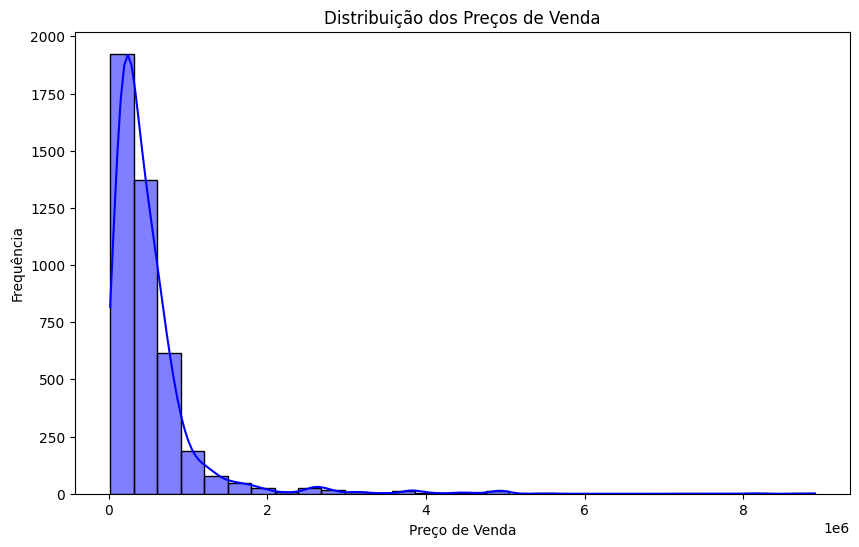

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['selling_price'], bins=30, kde=True, color='blue')
plt.title('Distribuição dos Preços de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

## Pré-processamento dos dados

Aqui é onde fazemos toda organização dos dados, processamentos e configurações para que nosso dataset esteja pronto para utilizarmos no modelo de regressão

Agora iremos categorizar as colunas necessárias para que possamos convertê-las posteriormente...

In [7]:
dataset['fuel'] = dataset['fuel'].astype('category')
dataset['seller_type'] = dataset['seller_type'].astype('category')
dataset['transmission'] = dataset['transmission'].astype('category')
dataset['owner'] = dataset['owner'].astype('category')
dataset['name'] = dataset['name'].astype('category')

dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Aqui é onde iremos converter as colunas categóricas do nosso dataset em valores `numéricos` para que o computador possa trabalhar com os dados.

In [8]:
for column in ['fuel', 'seller_type', 'transmission', 'owner', 'name']:
    dataset[column] = pd.Categorical(dataset[column]).codes

training_dataset = pd.get_dummies(dataset, drop_first=True)

training_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


## Preço de venda por tipo de combustível

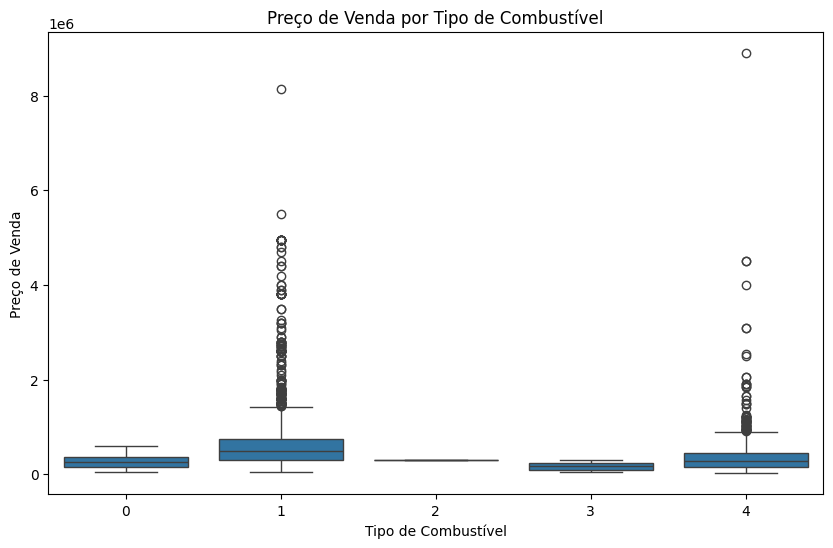

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel', y='selling_price', data=dataset)
plt.title('Preço de Venda por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço de Venda')
plt.show()

## Relação entre a quilometragem e o preço de venda

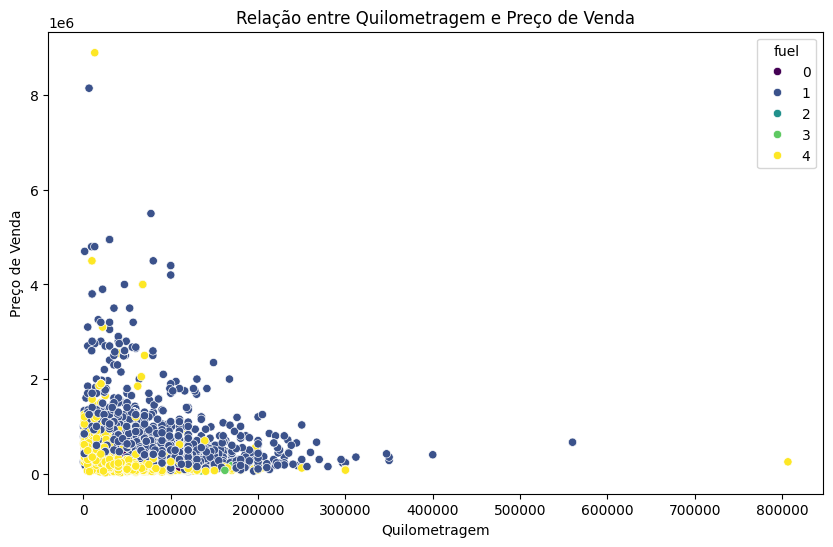

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=dataset, hue='fuel', palette='viridis')
plt.title('Relação entre Quilometragem e Preço de Venda')
plt.xlabel('Quilometragem')
plt.ylabel('Preço de Venda')
plt.show()

## Divisão dos dados de treinamento e teste

Agora vamos separar as variáveis **X (Features)** e as variáveis **Y (Target)**

In [11]:
X = training_dataset.drop('selling_price', axis=1)
y = training_dataset['selling_price']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Definindo e treinando os modelos

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

random_forest = RandomForestRegressor(n_estimators=350, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=350, random_state=42)

## Avaliação

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lr = linear_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

print("Regressão Linear:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))
print("Accuracy:", 1 - (mean_absolute_error(y_test, y_pred_lr) / np.mean(y_test)))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Regressão Linear:
MAE: 239119.88252106207
MSE: 166444750845.67252
R²: 0.4722417066011605
Accuracy: 0.5318723942001382

Random Forest:
MAE: 104576.72172391768
MSE: 45025530409.70802
R²: 0.8572343256986354


## Importância das Features no Random Forest (Feature Importance)

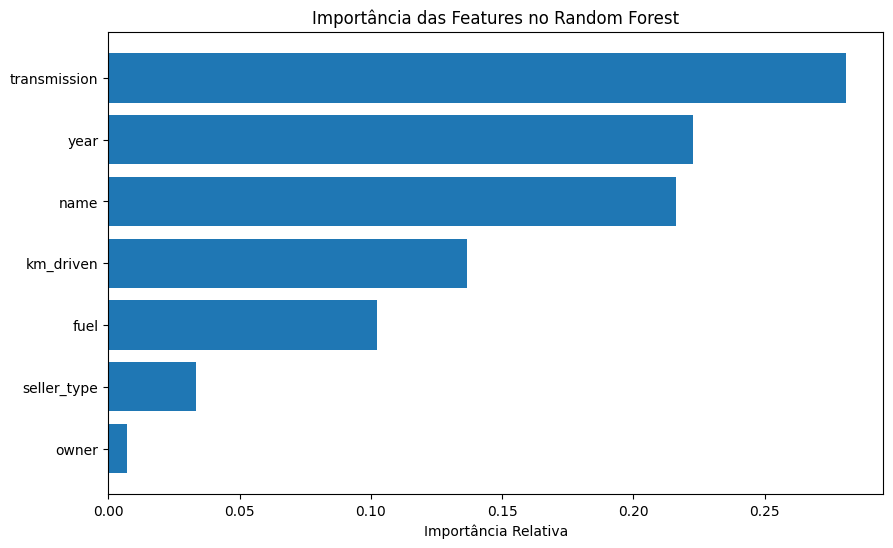

In [15]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Importância das Features no Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.show()

## Otimização do algoritmo selecionado (Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_

## Utilizando a melhor versão do modelo para a previsão

In [ ]:
final_dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
final_dataset = final_dataset.drop(columns=['selling_price'])

predicted_prices = best_rf_model.predict(training_dataset.drop('selling_price', axis=1))

final_dataset['selling_price'] = predicted_prices

## Previsões X Valores Reais

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Previsões vs Valores Reais (Random Forest)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

## Exportando os dados

In [ ]:
final_dataset.to_csv('results.csv', index=False)